<div style="color: Green; font-size: 30px; text-align: center; font-weight: bold;">
    Retail Store Campaign Analysis
</div>

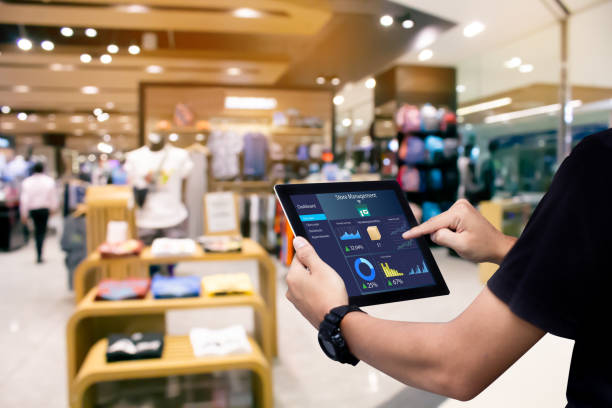

Introduction :

 Retail store campaign analysis involves the comprehensive examination of marketing campaigns and promotional activities undertaken by retail businesses to attract customers, increase sales, and drive profitability. Through the analysis of campaign effectiveness, customer response, and return on investment (ROI), retailers can optimize their marketing strategies, allocate resources efficiently, and enhance overall business performance.

**************

#  IMPORTING LIBRARIES AND LOADING DATA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)

%matplotlib inline


In [2]:
Retail_data = pd.read_csv("Retail_Campaign.csv")
Retail_data.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


In [3]:
Retail_data.columns

Index(['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code',
       'newbie', 'channel', 'segment', 'visit', 'conversion', 'spend'],
      dtype='object')

Our dataset has 12 columns.

1. recency : Indicates the recency of customer activity, such as the time elapsed since the customer's last purchase or interaction with the retail store.

2. history_segment : Represents a categorical segmentation of customers based on their historical purchase behavior or spending patterns.

3. history : Specifies the total historical spending or purchase amount of the customer with the retail store.

4. mens : Represents the customer's spending or purchase behavior related to men's products or merchandise.

5. womens : Represents the customer's spending or purchase behavior related to women's products or merchandise.

6. zip_code : Indicates the postal code or ZIP code of the customer's address, providing geographical information about the customer's location.

7. newbie : A binary indicator that specifies whether the customer is a new or existing customer of the retail store.

8. channel : Specifies the marketing channel or communication channel through which the customer was acquired or engaged with the retail store, such as online, offline, email, social media, etc.

9. segment : Represents a categorical segmentation of customers based on various characteristics or attributes, such as demographic information, purchase behavior, or customer preferences.

10. visit : Indicates whether the customer visited the retail store or website within a specific time period, serving as a measure of customer engagement or interaction.

11. conversion : Specifies whether the customer completed a desired action or converted, such as making a purchase, subscribing to a service, or responding to a marketing campaign.

12. spend : Represents the amount of money spent by the customer on purchases or transactions with the retail store, serving as a measure of customer value or profitability.

In [4]:
#Get number of Columns and rows

Retail_data.shape

(64000, 12)

In [5]:
#Get the data types
Retail_data.dtypes

recency              int64
history_segment     object
history            float64
mens                 int64
womens               int64
zip_code            object
newbie               int64
channel             object
segment             object
visit                int64
conversion           int64
spend              float64
dtype: object

In [6]:
#Summary of Statistics
Retail_data.describe()

,recency,history,mens,womens,newbie,visit,conversion,spend
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781,0.009031,1.050908
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890,0.094604,15.036448
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000,1.000000,499.000000


In [7]:
#Get Numeric Columns List
Num_Cols =Retail_data.select_dtypes(exclude = ['object']).columns
print("Total number of numeric Columns in DataSet is ") 
print(len(Num_Cols))
Num_Cols

Total number of numeric Columns in DataSet is 
8


Index(['recency', 'history', 'mens', 'womens', 'newbie', 'visit', 'conversion',
       'spend'],
      dtype='object')

In [8]:
#Get categoric Columns List
cat_Cols =Retail_data.select_dtypes(include = ['object']).columns
print("Total number of categoric Columns in DataSet is ") 
print(len(cat_Cols))
cat_Cols

Total number of categoric Columns in DataSet is 
4


Index(['history_segment', 'zip_code', 'channel', 'segment'], dtype='object')

In [11]:
# Getting Count of missing/Null Data if any

Retail_data.isnull().sum()


recency            0
history_segment    0
history            0
mens               0
womens             0
zip_code           0
newbie             0
channel            0
segment            0
visit              0
conversion         0
spend              0
dtype: int64

Our dataset has no null values

*******

# Data Visualisation


In [12]:
import seaborn as sns
sns.set(color_codes = True)

1. BAR PLOT FOR HISTORY SEGMENT.

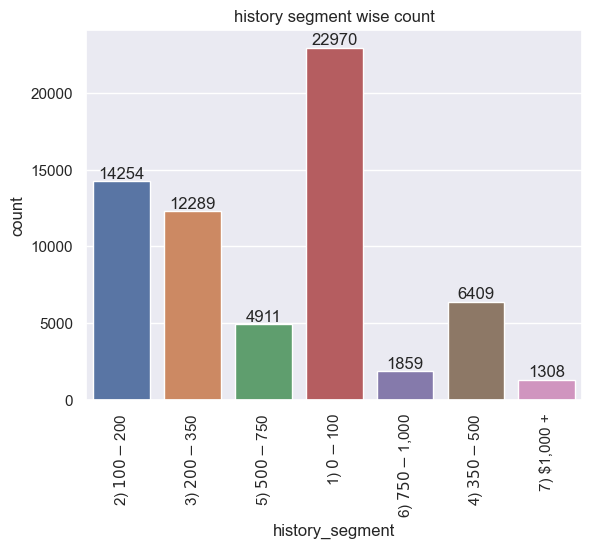

In [14]:

# it will give count of record for every segment of spend.

import matplotlib.pyplot as plt

#Barplot
ax = sns.countplot(x='history_segment',data = Retail_data)
plt.xticks(rotation=90)
plt.title("history segment wise count")
for container in ax.containers:
    ax.bar_label(container)

From the above graph, we can say that

1. 22970 purchase are between 0-100 dollors

2. 14254 purchase are between 100-200 dollors

3. 12289 purchases are between 200-350 dollars

4. least number of purchases are from 1000+ dollors

********

2.BAR PLOT FOR ZIP_CODE WISE PURCHASE HISTORY

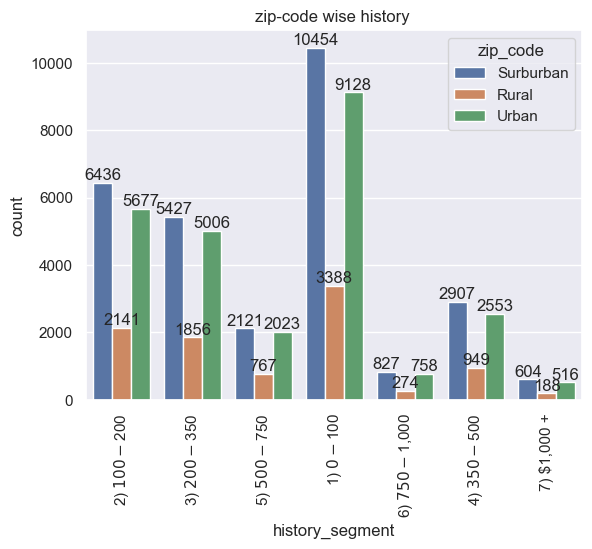

In [16]:
 # it will give the areas from where most purchases are made.
    
ax = sns.countplot(x='history_segment',data = Retail_data, hue = 'zip_code')
plt.xticks(rotation=90)
plt.title("zip-code wise history ")

for container in ax.containers:
    ax.bar_label(container)

In almost all the history segments , The purchases from  Suburban areas are maximum , followed by Urban  and purchases from Rural areas are the least.

*********

In [18]:
recency_count=Retail_data.groupby('recency').count()

In [19]:
recency_count

,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
recency,,,,,,,,,,,
1,8952,8952,8952,8952,8952,8952,8952,8952,8952,8952,8952
2,7537,7537,7537,7537,7537,7537,7537,7537,7537,7537,7537
3,5904,5904,5904,5904,5904,5904,5904,5904,5904,5904,5904
4,5077,5077,5077,5077,5077,5077,5077,5077,5077,5077,5077
5,4510,4510,4510,4510,4510,4510,4510,4510,4510,4510,4510
6,4605,4605,4605,4605,4605,4605,4605,4605,4605,4605,4605
7,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078
8,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495
9,6441,6441,6441,6441,6441,6441,6441,6441,6441,6441,6441


In [20]:
x = pd.DataFrame(recency_count)

3. PERCENT OF RECORD AS PER RECENCY

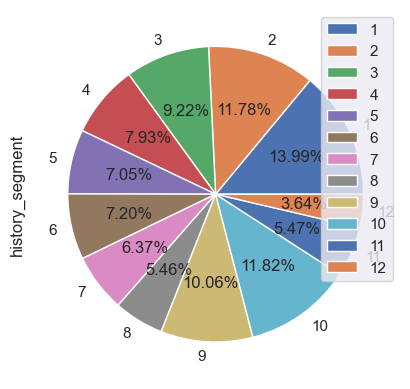

In [21]:
# PERCENT OF RECORD AS PER RECENCY

plot = x.plot.pie(y=0, legend=True, autopct='%1.2f%%')

*********

4. BAR PLOT TO COUNT THE VISIT RECORDS

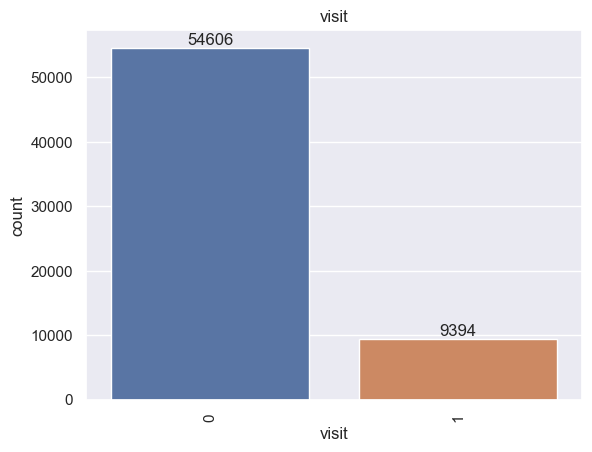

In [24]:
import matplotlib.pyplot as plt

#Barplot
ax = sns.countplot(x='visit',data = Retail_data)
plt.xticks(rotation=90)
plt.title("visit")
for container in ax.containers:
    ax.bar_label(container)

*********

5. BAR PLOT FOR VISIT AS PER RECENCY

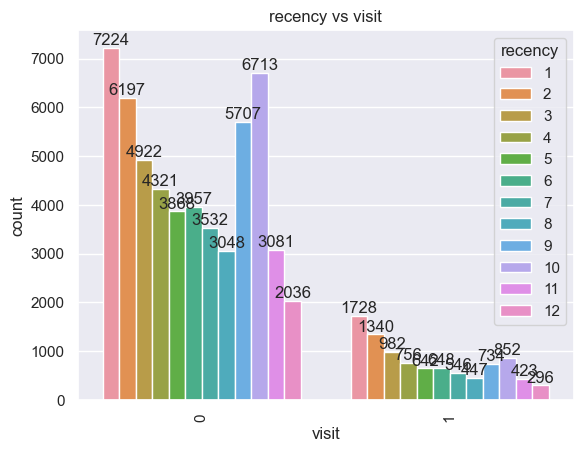

In [29]:
ax = sns.countplot(x='visit',data = Retail_data, hue = 'recency')
plt.xticks(rotation=90)
plt.title("recency vs visit")

for container in ax.containers:
    ax.bar_label(container)

As per above plot, those who visited recently visited again and not very recent did not visit again.

******

6. BAR PLOT TO COUNT VALUES FROM DIFFERENT CHANNEL

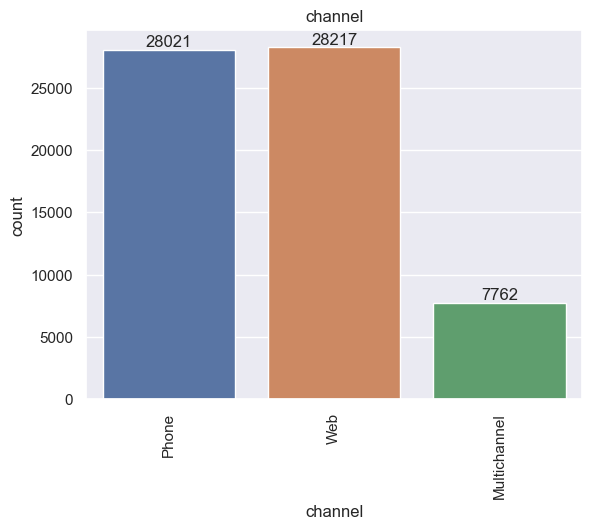

In [31]:
import matplotlib.pyplot as plt

#Barplot
ax = sns.countplot(x='channel',data = Retail_data)
plt.xticks(rotation=90)
plt.title("channel")
for container in ax.containers:
    ax.bar_label(container)

********

7. BAR PLOT FOR CHANNEL vs VISIT

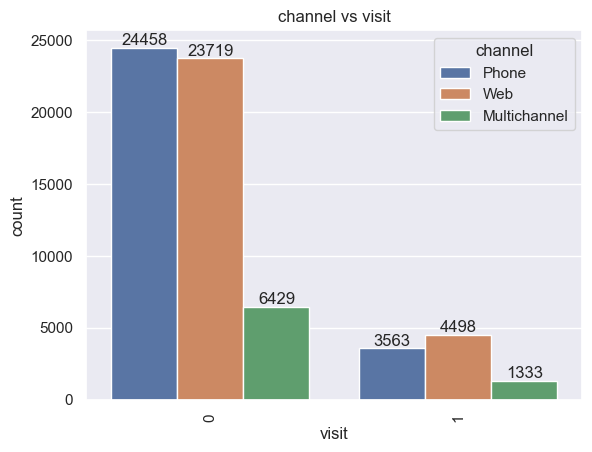

In [34]:
ax = sns.countplot(x='visit',data = Retail_data, hue = 'channel')
plt.xticks(rotation=90)
plt.title("channel vs visit")

for container in ax.containers:
    ax.bar_label(container)

Overall channel through which campaign was sent did not have any impact on visit.

*******

In [35]:
8. BOX PLOT FOR VISIT vs RECENCY

SyntaxError: invalid syntax (2216417623.py, line 1)

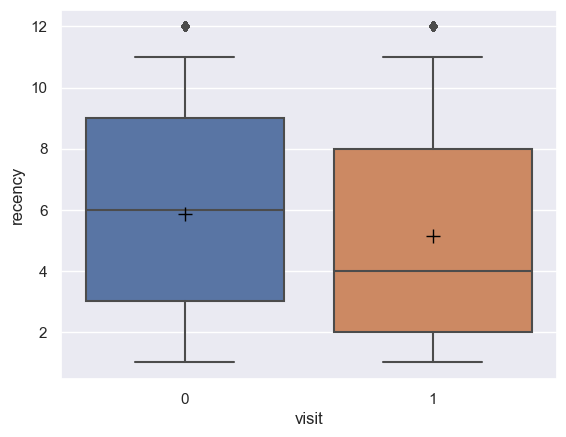

In [37]:

box_plot = sns.boxplot(x='visit', y='recency', data = Retail_data, whis=[5, 95], #Whisker on Percentile
             showmeans=True,
             meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})


For customers who did not visit again , average recency was 6 months and for customers who did visit again , average recency was 4 months.

********

# Data Preparation

In [38]:
zipcode_Dummy = pd.get_dummies(Retail_data['zip_code'])
zipcode_Dummy.head(5)

,Rural,Surburban,Urban
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1


In [39]:
channel_Dummy = pd.get_dummies(Retail_data['channel'],drop_first=True)
channel_Dummy.head(5)

,Phone,Web
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [40]:
segment_Dummy = pd.get_dummies(Retail_data['segment'])
segment_Dummy.head(5)

,Mens E-Mail,No E-Mail,Womens E-Mail
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1


In [41]:
Retail_data = pd.concat([Retail_data, zipcode_Dummy,channel_Dummy,segment_Dummy], axis=1)
Retail_data.head(5)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,Rural,Surburban,Urban,Phone,Web,Mens E-Mail,No E-Mail,Womens E-Mail
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,0,1,0,1,0,0,0,1
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,1,0,0,0,1,0,1,0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,0,1,0,0,1,0,0,1
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,1,0,0,0,1,1,0,0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,0,0,1,0,1,0,0,1


In [43]:
Retail_data.drop(columns=['zip_code', 'channel','segment'],inplace=True , axis=1)
Retail_data.head(5)

,recency,history_segment,history,mens,womens,newbie,visit,conversion,spend,Rural,Surburban,Urban,Phone,Web,Mens E-Mail,No E-Mail,Womens E-Mail
0,10,2) $100 - $200,142.44,1,0,0,0,0,0.0,0,1,0,1,0,0,0,1
1,6,3) $200 - $350,329.08,1,1,1,0,0,0.0,1,0,0,0,1,0,1,0
2,7,2) $100 - $200,180.65,0,1,1,0,0,0.0,0,1,0,0,1,0,0,1
3,9,5) $500 - $750,675.83,1,0,1,0,0,0.0,1,0,0,0,1,1,0,0
4,2,1) $0 - $100,45.34,1,0,0,0,0,0.0,0,0,1,0,1,0,0,1


In [45]:
Retail_data.drop(columns=['conversion', 'spend'],inplace=True , axis=1)
Retail_data.head(5)

KeyError: "['conversion', 'spend'] not found in axis"

Standardization for history column

In [46]:


from sklearn.preprocessing import StandardScaler
#initiate the scaler
ss = StandardScaler()

#Fit the data using the scaler
Xstd = ss.fit_transform(Retail_data[['history']].values)
Xstd.mean(), Xstd.std()

(6.072919944699607e-17, 1.0)

In [47]:
ss_data = pd.DataFrame(Xstd)
ss_data.head()

,0
0,-0.389003
1,0.339614
2,-0.239836
3,1.693278
4,-0.768068


In [48]:
ss_data.head(5)

,0
0,-0.389003
1,0.339614
2,-0.239836
3,1.693278
4,-0.768068


In [49]:
ss_data.columns =['history']
ss_data.head(5)

,history
0,-0.389003
1,0.339614
2,-0.239836
3,1.693278
4,-0.768068


In [50]:
Retail_data.drop(columns=['history'],inplace=True , axis=1)
Retail_data.head(5)

,recency,history_segment,mens,womens,newbie,visit,Rural,Surburban,Urban,Phone,Web,Mens E-Mail,No E-Mail,Womens E-Mail
0,10,2) $100 - $200,1,0,0,0,0,1,0,1,0,0,0,1
1,6,3) $200 - $350,1,1,1,0,1,0,0,0,1,0,1,0
2,7,2) $100 - $200,0,1,1,0,0,1,0,0,1,0,0,1
3,9,5) $500 - $750,1,0,1,0,1,0,0,0,1,1,0,0
4,2,1) $0 - $100,1,0,0,0,0,0,1,0,1,0,0,1


In [52]:
Retail_data = pd.concat([Retail_data, ss_data], axis=1)
Retail_data.head(5)

,recency,history_segment,mens,womens,newbie,visit,Rural,Surburban,Urban,Phone,Web,Mens E-Mail,No E-Mail,Womens E-Mail,history
0,10,2) $100 - $200,1,0,0,0,0,1,0,1,0,0,0,1,-0.389003
1,6,3) $200 - $350,1,1,1,0,1,0,0,0,1,0,1,0,0.339614
2,7,2) $100 - $200,0,1,1,0,0,1,0,0,1,0,0,1,-0.239836
3,9,5) $500 - $750,1,0,1,0,1,0,0,0,1,1,0,0,1.693278
4,2,1) $0 - $100,1,0,0,0,0,0,1,0,1,0,0,1,-0.768068


In [54]:
import movecolumn as mc
mc.MoveToLast(Retail_data,'visit')
Retail_data.head(5)

,recency,history_segment,mens,womens,newbie,Rural,Surburban,Urban,Phone,Web,Mens E-Mail,No E-Mail,Womens E-Mail,history,visit
0,10,2) $100 - $200,1,0,0,0,1,0,1,0,0,0,1,-0.389003,0
1,6,3) $200 - $350,1,1,1,1,0,0,0,1,0,1,0,0.339614,0
2,7,2) $100 - $200,0,1,1,0,1,0,0,1,0,0,1,-0.239836,0
3,9,5) $500 - $750,1,0,1,1,0,0,0,1,1,0,0,1.693278,0
4,2,1) $0 - $100,1,0,0,0,0,1,0,1,0,0,1,-0.768068,0


Standardization for recency coloumn

In [55]:
from sklearn.preprocessing import StandardScaler
#initiate the scaler
ss = StandardScaler()

#Fit the data using the scaler
Xstd1 = ss.fit_transform(Retail_data[['recency']].values)
Xstd.mean(), Xstd.std()

(6.072919944699607e-17, 1.0)

In [56]:
ss_data1=pd.DataFrame(Xstd1)

In [57]:
ss_data1.head(5)

,0
0,1.207751
1,0.067359
2,0.352457
3,0.922653
4,-1.073034


In [58]:
ss_data1.columns =['recency']
ss_data1.head(5)

,recency
0,1.207751
1,0.067359
2,0.352457
3,0.922653
4,-1.073034


In [61]:
Retail_data = pd.concat([Retail_data, ss_data1], axis=1)
Retail_data.head(5)

,recency,history_segment,mens,womens,newbie,Rural,Surburban,Urban,Phone,Web,Mens E-Mail,No E-Mail,Womens E-Mail,history,visit,recency
0,10,2) $100 - $200,1,0,0,0,1,0,1,0,0,0,1,-0.389003,0,1.207751
1,6,3) $200 - $350,1,1,1,1,0,0,0,1,0,1,0,0.339614,0,0.067359
2,7,2) $100 - $200,0,1,1,0,1,0,0,1,0,0,1,-0.239836,0,0.352457
3,9,5) $500 - $750,1,0,1,1,0,0,0,1,1,0,0,1.693278,0,0.922653
4,2,1) $0 - $100,1,0,0,0,0,1,0,1,0,0,1,-0.768068,0,-1.073034


In [63]:
Retail_data.drop(columns=['recency'],inplace=True , axis=1)
Retail_data.head(5)

,history_segment,mens,womens,newbie,Rural,Surburban,Urban,Phone,Web,Mens E-Mail,No E-Mail,Womens E-Mail,history,visit
0,2) $100 - $200,1,0,0,0,1,0,1,0,0,0,1,-0.389003,0
1,3) $200 - $350,1,1,1,1,0,0,0,1,0,1,0,0.339614,0
2,2) $100 - $200,0,1,1,0,1,0,0,1,0,0,1,-0.239836,0
3,5) $500 - $750,1,0,1,1,0,0,0,1,1,0,0,1.693278,0
4,1) $0 - $100,1,0,0,0,0,1,0,1,0,0,1,-0.768068,0


In [64]:
Retail_data = pd.concat([Retail_data, ss_data1], axis=1)
Retail_data.head(5)

,history_segment,mens,womens,newbie,Rural,Surburban,Urban,Phone,Web,Mens E-Mail,No E-Mail,Womens E-Mail,history,visit,recency
0,2) $100 - $200,1,0,0,0,1,0,1,0,0,0,1,-0.389003,0,1.207751
1,3) $200 - $350,1,1,1,1,0,0,0,1,0,1,0,0.339614,0,0.067359
2,2) $100 - $200,0,1,1,0,1,0,0,1,0,0,1,-0.239836,0,0.352457
3,5) $500 - $750,1,0,1,1,0,0,0,1,1,0,0,1.693278,0,0.922653
4,1) $0 - $100,1,0,0,0,0,1,0,1,0,0,1,-0.768068,0,-1.073034


*******

# MODEL BUILDING

In [65]:
# defining x and y variables

X = Retail_data[['mens','womens','newbie','Surburban','Urban','Rural','Phone','Web','Mens E-Mail','Womens E-Mail','No E-Mail','history','recency']]
y = Retail_data['visit']  

In [66]:
from sklearn.model_selection import train_test_split

# Divide Data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state = 0)

*****

1. LOGISTIC REGRESSION

In [67]:
#Perform Logistic Regression
from sklearn.linear_model import LogisticRegression

Log_Model = LogisticRegression(random_state = 0)


In [68]:
#Fit The Regression Model
Log_Model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [69]:
#Show coefficients 
print(Log_Model.coef_)

[[ 0.60750843  0.78321743 -0.56726625 -0.12342419 -0.13555966  0.25954567
  -0.10763151  0.15420551  0.30462356  0.06738607 -0.37144781  0.10971506
  -0.18730276]]


In [70]:
#Print intercept
print(Log_Model.intercept_)

[-2.28571881]


In [71]:
#Make the prediction on Test Dataset
y_pred_lr = Log_Model.predict(X_test)

In [72]:
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
#Display Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test,y_pred_lr)

array([[10965,     4],
       [ 1829,     2]], dtype=int64)

In [74]:
#Print Accuracy of Model
from sklearn import metrics
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(y_pred_lr,y_test)*100,'%')

The accuracy of the Logistic Regression is 85.6796875 %


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


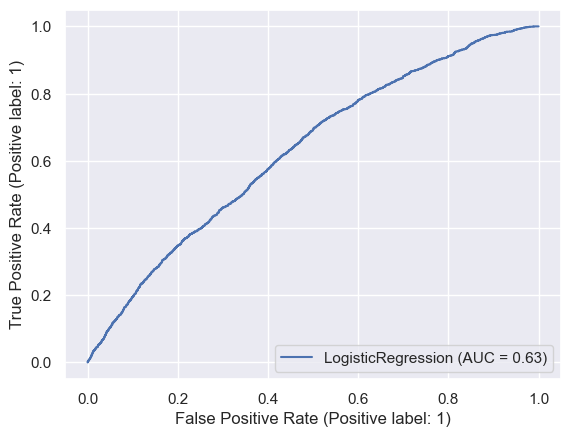

In [75]:
from sklearn.pipeline import Pipeline

#Getting ROC Curve and find AUC (Area Under Curve)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_lr, pos_label=1)
metrics.plot_roc_curve(Log_Model, X_test, y_test)

*****

2. DECISION TREE

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

#train classifier
dtree_model = DecisionTreeClassifier(random_state=0) # defining decision tree classifier
dtree_model = dtree_model.fit(X_train, y_train) # train data on new data and new target
prediction_dtree = dtree_model.predict(X_test) #  assign removed data as input


In [77]:
#Get Accuracy Score
from sklearn.metrics import accuracy_score,confusion_matrix

print('The accuracy of the Decission Tree Model without pruning is',accuracy_score(prediction_dtree,y_test)*100,'%')


The accuracy of the Decission Tree Model without pruning is 76.4296875 %


In [78]:
#Check model Accuracy for gini, entropy method
dtree_model = DecisionTreeClassifier(criterion='gini')
dtree_model.fit(X_train, y_train)
pred = dtree_model.predict(X_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dtree_model = DecisionTreeClassifier(criterion='entropy')
dtree_model.fit(X_train, y_train)
pred = dtree_model.predict(X_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

Criterion=gini 0.767109375
Criterion=entropy 0.767890625


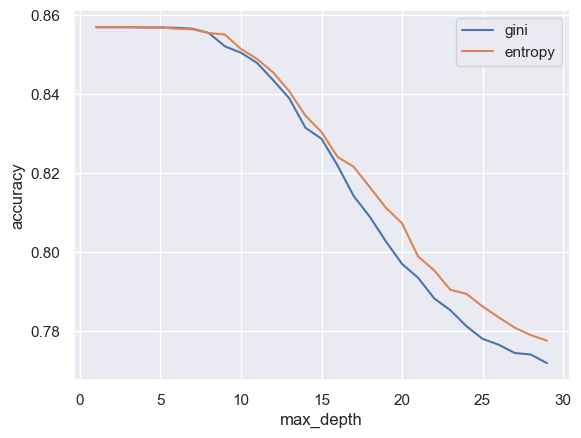

In [79]:
#Check between Gini and Entropy which provides best accuracy and for how many trees

max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree_model = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree_model.fit(X_train, y_train)
 pred = dtree_model.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree_model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree_model.fit(X_train, y_train)
 pred = dtree_model.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [80]:
#It seems like in this scenario entropy works better over gini
#for shorter trees and it’s more accurate (near 0.85-.86). So let’s draw the tree with max_depth=6 and criterion=entropy 
#to see how it looks like.

dtree_model = DecisionTreeClassifier(random_state=0,criterion='entropy', max_depth=6)
dtree_model.fit(X_train, y_train)
y_pred_dt = dtree_model.predict(X_test)
accuracy_score(y_test, y_pred_dt)


0.8565625

In [81]:
print('The accuracy of the Decission Tree Model with pruning is',accuracy_score(y_test,y_pred_dt)*100,'%')

The accuracy of the Decission Tree Model with pruning is 85.65625 %


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


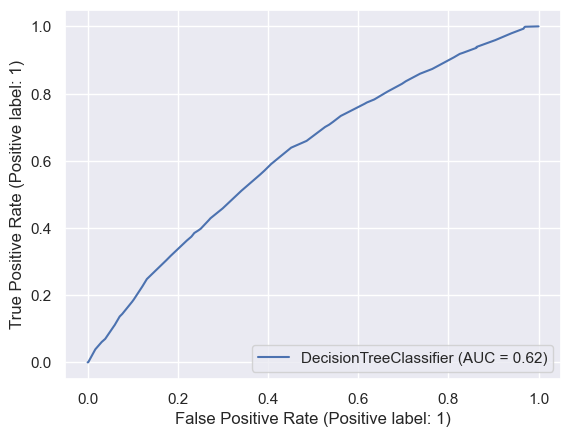

In [82]:
#Getting ROC Curve and find AUC (Area Under Curve)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_dt, pos_label=1)
metrics.plot_roc_curve(dtree_model, X_test, y_test)

******

3. KNN Model (K-Nearest Neighborhood)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
 
knn_model = KNeighborsClassifier(n_neighbors = 1)

In [85]:
#fit KNN model and Predict

knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [86]:
pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
# Let's evaluate our KNN model !

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
 
print(classification_report(y_test, pred_knn))

[[9357 1612]
 [1508  323]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     10969
           1       0.17      0.18      0.17      1831

    accuracy                           0.76     12800
   macro avg       0.51      0.51      0.51     12800
weighted avg       0.76      0.76      0.76     12800



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Text(0, 0.5, 'Error Rate')

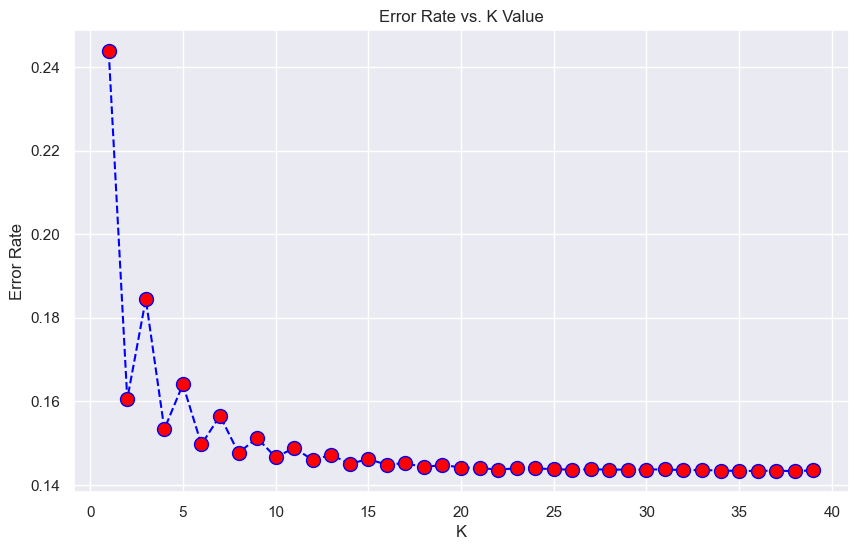

In [88]:
# Chose optimum value for k
error_rate = []
 
# Will take some time
for i in range(1, 40):
     
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
 
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
 
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [89]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn_model = KNeighborsClassifier(n_neighbors = 1)
 
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)
 
print('WITH K = 1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
 
 
# NOW WITH K = 15
knn_model = KNeighborsClassifier(n_neighbors = 15)
 
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)
 
print('WITH K = 15')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


WITH K = 1


[[9357 1612]
 [1508  323]]


              precision    recall  f1-score   support

           0       0.86      0.85      0.86     10969
           1       0.17      0.18      0.17      1831

    accuracy                           0.76     12800
   macro avg       0.51      0.51      0.51     12800
weighted avg       0.76      0.76      0.76     12800



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


WITH K = 15


[[10909    60]
 [ 1811    20]]


              precision    recall  f1-score   support

           0       0.86      0.99      0.92     10969
           1       0.25      0.01      0.02      1831

    accuracy                           0.85     12800
   macro avg       0.55      0.50      0.47     12800
weighted avg       0.77      0.85      0.79     12800



In [90]:
# NOW WITH K = 9
knn_model = KNeighborsClassifier(n_neighbors = 9)
 
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)
 
print('WITH K = 9')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


WITH K = 9


[[10811   158]
 [ 1778    53]]


              precision    recall  f1-score   support

           0       0.86      0.99      0.92     10969
           1       0.25      0.03      0.05      1831

    accuracy                           0.85     12800
   macro avg       0.55      0.51      0.48     12800
weighted avg       0.77      0.85      0.79     12800



In [91]:
# NOW WITH K = 10
knn_model = KNeighborsClassifier(n_neighbors = 10)
 
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)
 
print('WITH K = 10')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


WITH K = 10


[[10899    70]
 [ 1807    24]]


              precision    recall  f1-score   support

           0       0.86      0.99      0.92     10969
           1       0.26      0.01      0.02      1831

    accuracy                           0.85     12800
   macro avg       0.56      0.50      0.47     12800
weighted avg       0.77      0.85      0.79     12800



In [92]:
from sklearn.metrics import accuracy_score
print('The accuracy of the KNN Model with k=15 is',accuracy_score(y_test, pred)*100,'%')

The accuracy of the KNN Model with k=15 is 85.3359375 %


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


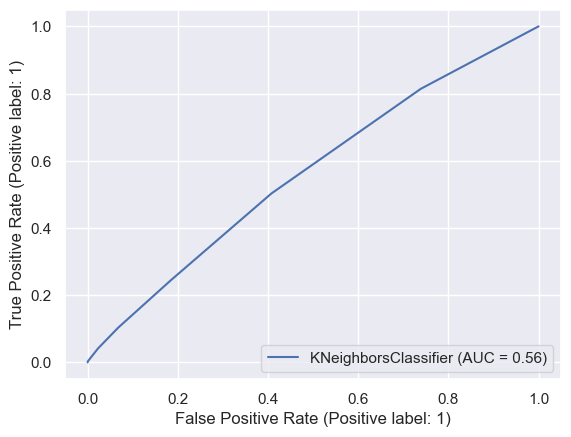

In [93]:
from sklearn.pipeline import Pipeline

#Getting ROC Curve and find AUC (Area Under Curve)
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred, pos_label=1)
metrics.plot_roc_curve(knn_model, X_test, y_test)

*************

The accuracy of the Logistic Regression is 85.6796875 %

The accuracy of the Decission Tree Model with pruning is 85.65625 %

The accuracy of the KNN Model with k=15 is 85.3359375 %

So we will choose Logistic regression model for our final prediction.


X = RetailData[['mens','womens','newbie','Surburban','Urban','Rural','Phone','Web','Mens E-Mail','Womens E-Mail','No E-Mail','history','recency']]


y = RetailData['visit'] 

In [95]:
print("Enter the below details")
a = int(input("Enter men or not "))
b = int(input("Enter female or not "))
c = int(input("newbie or not " ))
d = int(input("is it from surburban? "))
e = int(input("is it from urban? "))
f = int(input("is it from rural "))
g = int(input("get mail/msg through phone? "))
h = int(input("get mail/msg through web? "))
i = int(input("mens email "))
j = int(input("womens email "))
k = int(input("no mail "))
l = int(input("history? "))
m = int(input("recency? "))
features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l, m]])
print("Finding if the customer will visit again: ", Log_Model.predict(features))

Enter the below details
Enter men or not 1
Enter female or not 0
newbie or not 1
is it from surburban? 0
is it from urban? 0
is it from rural 1
get mail/msg through phone? 1
get mail/msg through web? 0
mens email 1
womens email 0
no mail 0
history? 1
recency? 2
Finding if the customer will visit again:  [0]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


***

In [97]:
print("Enter the below details")
a = int(input("Enter men or not "))
b = int(input("Enter female or not "))
c = int(input("newbie or not " ))
d = int(input("is it from surburban? "))
e = int(input("is it from urban? "))
f = int(input("is it from rural "))
g = int(input("get mail/msg through phone? "))
h = int(input("get mail/msg through web? "))
i = int(input("mens email "))
j = int(input("womens email "))
k = int(input("no mail "))
l = int(input("history? "))
m = int(input("recency? "))
features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l, m]])
print("Finding if the customer will visit again: ", Log_Model.predict(features))

Enter the below details
Enter men or not 1
Enter female or not 0
newbie or not 1
is it from surburban? 1
is it from urban? 0
is it from rural 0
get mail/msg through phone? 1
get mail/msg through web? 0
mens email 1
womens email 0
no mail 0
history? 150
recency? 10
Finding if the customer will visit again:  [1]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


So this is how we can predict customer will visit again or not.

************

Conclusion:

Retail store campaign analysis plays a crucial role in helping retailers understand the effectiveness of their marketing efforts, optimize resource allocation, and drive business growth. By leveraging data-driven insights and analytical techniques, retailers can identify opportunities for improvement, enhance customer engagement, and achieve greater success in a competitive marketplace.

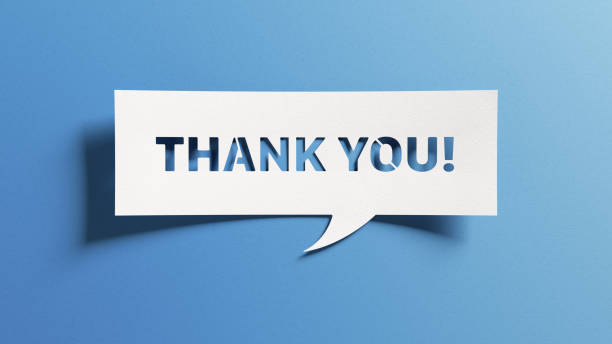